<a href="https://colab.research.google.com/github/natli-think/ID2211-Minimum-cut-trees/blob/main/ID2211_Min_Cut_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ID2211 Minimum Cut Trees
##### Team Members: Yuvraj Singh, Linta Oommen, Erik Blondell, Duc Min Pham
The purpose of this project is to explore clustering algorithms for finding minimum cut trees in large graphs and evaluate their effectiveness in graph clustering. We are trying to understand the feasibility and performance
in different graph structures.<br>
<br>The datasets used are:

*   Wiki-Vote: The dataset comprises Wikipedia administrator elections and vote history extracted from the complete dump of Wikipedia page edit history up to January 3, 2008. It includes 2,794 elections with a total of 103,663 votes cast by 7,066 users. Of these, 1,235 elections resulted in successful promotions, while 1,559 did not. The network represents Wikipedia users, where a directed edge from user i to user j indicates that user i voted on user j.
*   Amazon-products: Network was collected by crawling Amazon website. It is based on Customers Who Bought This Item Also Bought feature of the Amazon website. If a product i is frequently co-purchased with product j, the graph contains an undirected edge from i to j. Each product category provided by Amazon defines each ground-truth community.




# Install and Import Dataset

In [ ]:
pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:00


In [ ]:
# Import required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)
import pandas as pd
import torch_geometric
from torch_geometric.data import Data
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random

2.2.1+cu121


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Convert the dataset to a Graph (Dataframe)

In [ ]:
edges = pd.read_csv("/content/drive/MyDrive/ID2211 Data Mining/Datasets/wiki-Vote.txt.gz", sep="\t", header=None, names=["from", "to"])

In [ ]:
sampled_edges = edges.sample(n=1000)

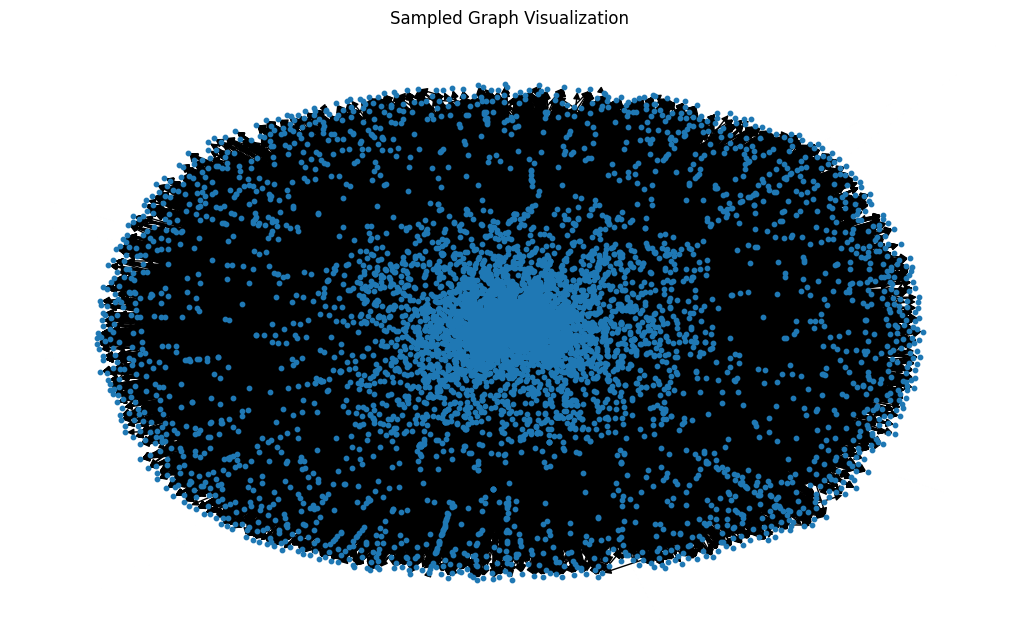

In [ ]:
# # Create a directed graph
# G = nx.from_pandas_edgelist(edges, 'from', 'to', create_using=nx.DiGraph())

# # Plot the graph
# plt.figure(figsize=(10, 6))
# pos = nx.spring_layout(G)  # Adjust the layout algorithm as needed
# nx.draw(G, pos, with_labels=False, node_size=10)
# plt.title('Sampled Graph Visualization')
# plt.show()

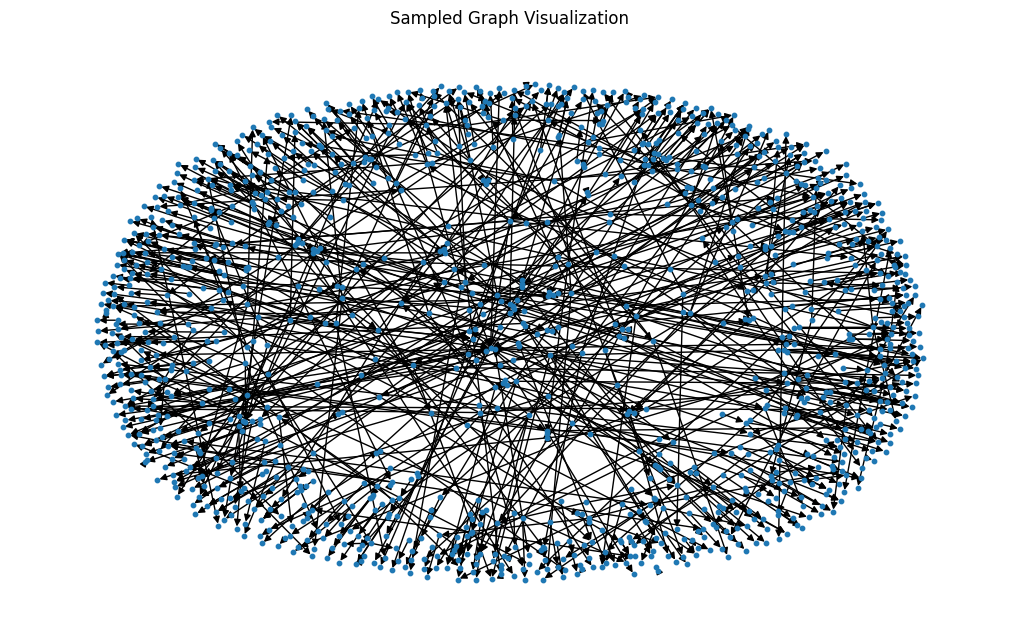

In [ ]:
# # Create a directed graph
# G = nx.from_pandas_edgelist(sampled_edges, 'from', 'to', create_using=nx.DiGraph())

# # Plot the graph
# plt.figure(figsize=(10, 6))
# pos = nx.spring_layout(G)  # Adjust the layout algorithm as needed
# nx.draw(G, pos, with_labels=False, node_size=10)
# plt.title('Sampled Graph Visualization')
# plt.show()

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/ID2211 Data Mining/Datasets/wiki-Vote.txt.gz", sep="\t", header=None, names=["from", "to"], skiprows=4)

In [ ]:
# Create a dataframe to count the number of outgoing and incoming edges for each node
outgoing_edges = dataset.groupby("from").size().reset_index(name='outgoing_edges')
incoming_edges = dataset.groupby("to").size().reset_index(name='incoming_edges')

In [ ]:
# Merge the two dataframes on the node ID
node_features = pd.merge(outgoing_edges, incoming_edges, left_on="from", right_on="to", how="outer").fillna(0)

In [ ]:
# Drop the redundant columns
node_features.drop(["to"], axis=1, inplace=True)

In [ ]:
# Select the feature columns for clustering
X = node_features[["outgoing_edges", "incoming_edges"]]

# Calculate the Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

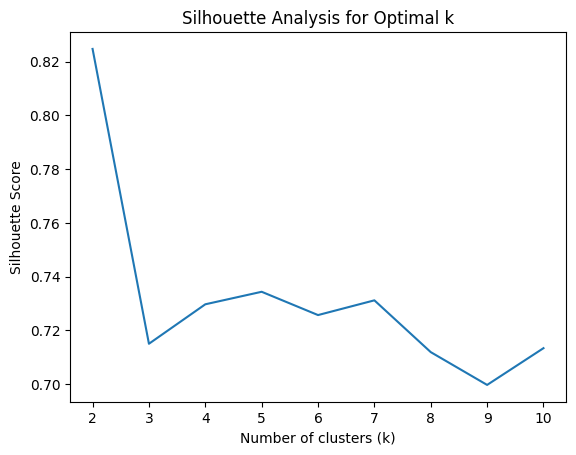

In [ ]:

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# wcss_list = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, random_state=42)
#     kmeans.fit(X)
#     wcss_list.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss_list)
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
# plt.show()

NameError: name 'KMeans' is not defined

# Use Elbow Method to find the value of K for K-means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

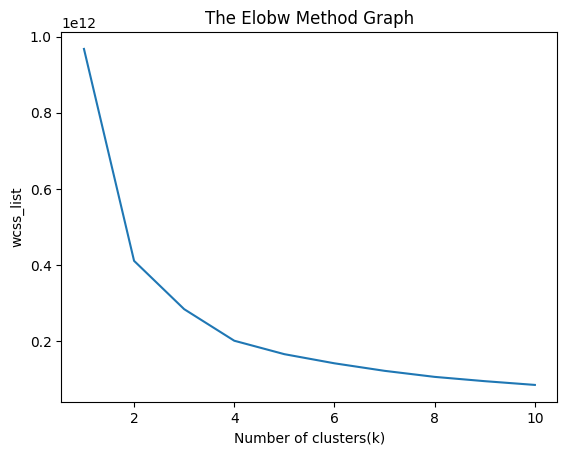

In [ ]:
#finding optimal number of clusters using the elbow method

wcss_list= []  #Initializing the list for the values of WCSS

x=dataset.values
#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Perform K-means Clustering with K=2 and K=5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


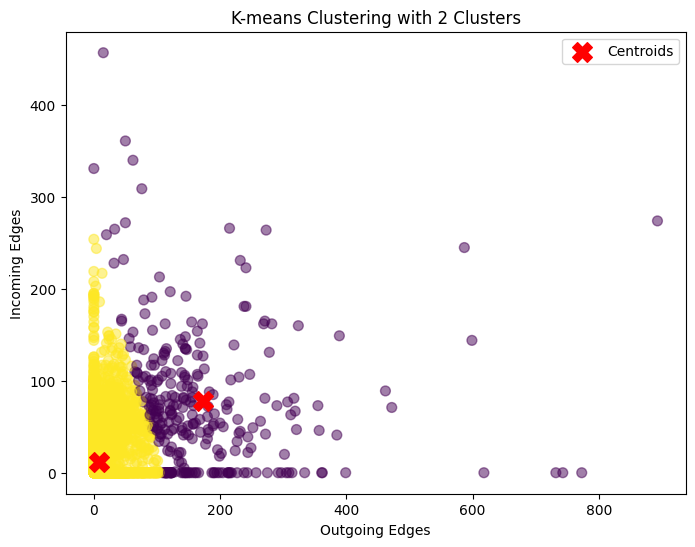

Silhouette Score for 2 Clusters: 0.8247161032033152


In [ ]:


# Perform K-means clustering with 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(X)

# Get cluster labels and silhouette score
cluster_labels_2 = kmeans_2.labels_
silhouette_score_2 = silhouette_score(X, cluster_labels_2)

# Plot the clusters for 2 clusters
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels_2, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering with 2 Clusters')
plt.xlabel('Outgoing Edges')
plt.ylabel('Incoming Edges')
plt.legend()
plt.show()

print("Silhouette Score for 2 Clusters:", silhouette_score_2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


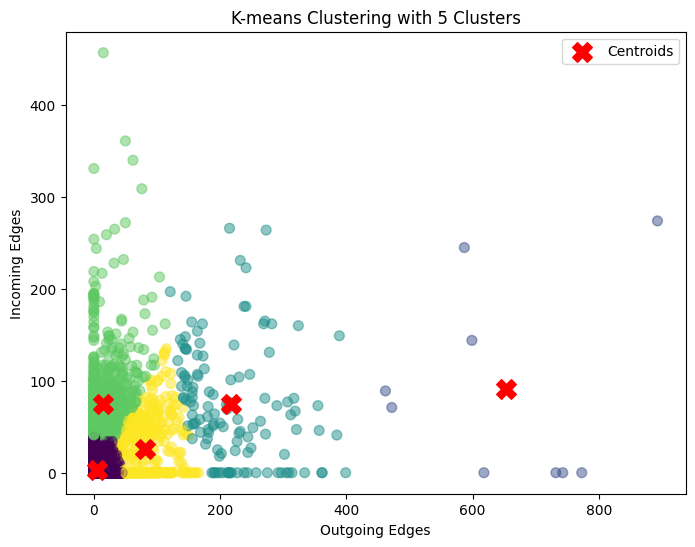

Silhouette Score for 5 Clusters: 0.734371401038054


In [ ]:
# Perform K-means clustering with 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5.fit(X)

# Get cluster labels and silhouette score
cluster_labels_5 = kmeans_5.labels_
silhouette_score_5 = silhouette_score(X, cluster_labels_5)

# Plot the clusters for 5 clusters
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels_5, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering with 5 Clusters')
plt.xlabel('Outgoing Edges')
plt.ylabel('Incoming Edges')
plt.legend()
plt.show()

print("Silhouette Score for 5 Clusters:", silhouette_score_5)

In [ ]:
# Create a directed graph from the dataset
graph = nx.DiGraph()
graph.add_edges_from(dataset.values)

# Performing Krager's Algorithm

In [ ]:

def karger_min_cut(graph):
    while len(graph.nodes) > 2:
        # Choose a random edge
        edge = random.choice(list(graph.edges()))
        # Contract the edge
        graph = nx.contracted_edge(graph, edge, self_loops=False)
    # Return the min cut
    return len(graph.edges())

In [ ]:
# Apply Karger's algorithm to find the minimum cut
min_cut = karger_min_cut(graph)
print("Minimum Cut:", min_cut)

KeyboardInterrupt: 